Chapter 17

# 泰勒展开
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过泰勒展开来研究函数

$$
f(x) = e^x
$$

在某个展开点 $x_0$ 处的逼近特性，并分析不同阶数的近似效果和误差。具体来说，代码在点 $x_0 = 0$ 处对 $f(x)$ 进行泰勒展开，并生成从 0 阶到 5 阶的多项式近似，通过可视化对比各阶数的泰勒展开与原函数的逼近情况。

泰勒展开式表示为：

$$
f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n
$$

在 $f(x) = e^x$ 的情况下，由于 $f^{(n)}(x) = e^x$，在 $x_0 = 0$ 展开时各阶导数均为 1，因此展开式简化为：

$$
f(x) \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}
$$

代码通过绘制不同阶数的泰勒多项式（从 0 阶到 5 阶）来展示近似效果，并将这些近似曲线与原函数 $f(x)$ 进行对比，以观察随着阶数增加，近似如何逐渐逼近 $f(x)$。

此外，代码还生成了误差分析图。以 2 阶泰勒展开为例，误差定义为：

$$
\text{误差} = f(x) - f_{\text{approx}}(x)
$$

其中 $f_{\text{approx}}(x)$ 是二阶近似，即 $1 + x + \frac{x^2}{2}$. 代码展示了误差在 $x$ 轴上的分布情况，表明在 $x_0$ 附近，误差较小，而远离 $x_0$ 时误差增大。这说明泰勒展开在展开点附近提供了良好的近似，但远离该点时近似精度降低。

## 导入包

In [1]:
from sympy import latex, lambdify, diff, sin, log, exp, series  # 导入符号计算库中用于导数、泰勒展开等功能
from sympy.abc import x  # 定义符号变量 x
import numpy as np
from matplotlib import pyplot as plt  # 导入绘图库 Matplotlib
from matplotlib import cm  # 导入颜色映射模块

## 定义待展开的函数 f(x) 并初始化 x 取值范围和展开点 x_0

In [2]:
f_x = exp(x)  # 定义函数 f(x) = e^x
f_x

exp(x)

In [3]:
x_array = np.linspace(-2, 2, 100)  # 定义 x 的范围，用于绘制函数和展开项
x_0 = 0  # 泰勒展开的中心点

In [4]:
y_0 = f_x.evalf(subs={x: x_0})  # 计算 f(x_0) 的值

In [5]:
f_x_fcn = lambdify(x, f_x)  # 将符号函数转换为可数值化的函数
f_x_array = f_x_fcn(x_array)  # 计算函数在 x_array 上的值

## 绘制函数和泰勒展开项

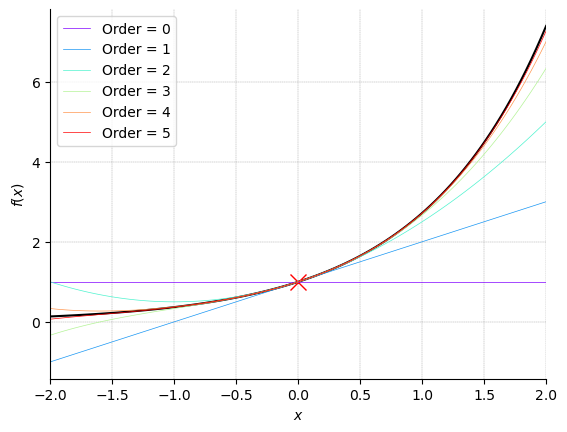

In [6]:
fig, ax = plt.subplots()  # 创建绘图窗口

ax.plot(x_array, f_x_array, 'k', linewidth=1.5)  # 绘制原函数 f(x)
ax.plot(x_0, y_0, 'xr', markersize=12)  # 标记展开点 (x_0, y_0)
ax.set_xlabel(r"$\it{x}$")  # 设置 x 轴标签
ax.set_ylabel(r"$\it{f}(\it{x})$")  # 设置 y 轴标签

highest_order = 5  # 设置泰勒展开的最高阶数
order_array = np.arange(0, highest_order + 1)  # 定义阶数数组
colors = plt.cm.rainbow(np.linspace(0, 1, len(order_array)))  # 使用彩虹色映射不同阶数

i = 0  # 颜色索引初始化

## 绘制不同阶的泰勒展开近似
for order in order_array:
    f_series = f_x.series(x, x_0, order + 1).removeO()  # 计算泰勒展开项（去除高阶小量）
    f_series_fcn = lambdify(x, f_series)  # 将展开项转换为数值函数
    f_series_array = f_series_fcn(x_array)  # 计算展开项在 x_array 上的值

    ax.plot(x_array, x_array * 0 + f_series_array, linewidth=0.5, color=colors[i, :], label='Order = %0.0f' % order)  # 绘制展开项
    i += 1  # 更新颜色索引

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
ax.set_xlim(x_array.min(), x_array.max())  # 设置 x 轴范围
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['top'].set_visible(False)  # 隐藏顶部边框

plt.legend()  # 添加图例

## 误差分析图

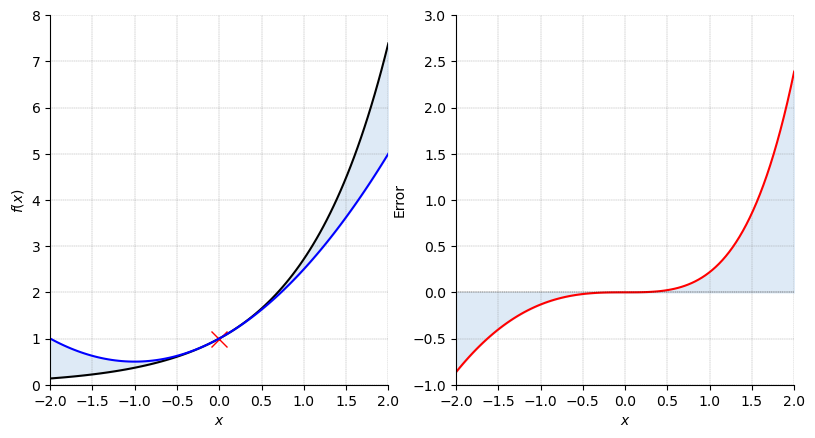

In [7]:
fig = plt.figure(figsize=plt.figaspect(0.5))  # 创建一个具有宽比例的图形
ax = fig.add_subplot(1, 2, 1)  # 左图绘制原函数和展开项

ax.plot(x_array, f_x_array, 'k', linewidth=1.5)  # 绘制原函数 f(x)
ax.plot(x_0, y_0, 'xr', markersize=12)  # 标记展开点 (x_0, y_0)
ax.set_xlabel(r"$\it{x}$")  # 设置 x 轴标签
ax.set_ylabel(r"$\it{f}(\it{x})$")  # 设置 y 轴标签

highest_order = 2  # 设置误差分析的展开阶数

f_series = f_x.series(x, x_0, highest_order + 1).removeO()  # 计算最高阶数为 2 的泰勒展开
f_series_fcn = lambdify(x, f_series)  # 转换为数值函数
f_series_array = f_series_fcn(x_array)  # 计算展开项在 x_array 上的值
f_series_array = x_array * 0 + f_series_array  # 保持数组形状一致

ax.plot(x_array, f_series_array, linewidth=1.5, color='b')  # 绘制二阶展开的近似曲线

ax.fill_between(x_array, f_x_array, x_array * 0 + f_series_array, color='#DEEAF6')  # 用颜色填充误差区域

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
ax.set_xlim(x_array.min(), x_array.max())  # 设置 x 轴范围
ax.set_ylim(np.floor(f_x_array.min()), np.ceil(f_x_array.max()))  # 设置 y 轴范围
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['top'].set_visible(False)  # 隐藏顶部边框

ax = fig.add_subplot(1, 2, 2)  # 右图绘制误差

error = f_x_array - f_series_array  # 计算误差
ax.plot(x_array, error, 'r', linewidth=1.5)  # 绘制误差曲线
ax.fill_between(x_array, error, color='#DEEAF6')  # 用颜色填充误差区域
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.25)  # 添加 y=0 的参考线
ax.set_xlabel(r"$\it{x}$")  # 设置 x 轴标签
ax.set_ylabel("Error")  # 设置 y 轴标签

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
ax.set_xlim(x_array.min(), x_array.max())  # 设置 x 轴范围
ax.set_ylim(np.floor(error.min()), np.ceil(error.max()))  # 设置 y 轴范围
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['top'].set_visible(False)  # 隐藏顶部边框